In [ ]:
pip install catboost

#**Import Libraries**

In [ ]:
import numpy as np
import re
import pandas as pd

#-------------------------------------------------------#
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import webcolors

#-------------------------------------------------------#
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

#-------------------------------------------------------#
import warnings
warnings.filterwarnings("ignore")

#-------------------------------------------------------#
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#------------------------------------------------------#
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from catboost import CatBoostRegressor


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

#-------------------------------------------------------#

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Import Data**

In [ ]:
url = 'https://raw.githubusercontent.com/buudinh16/Car_Price_Prediction/main/Car_Price_1.csv'
df = pd.read_csv(url)
df

,origin,car_model,mileage,exterior_color,num_of_doors,seating_capacity,transmission,engine_type,engine_capacity,drive_type,fuel_consumption,brand,grade,year_of_manufacture,price
0,1,4.0,78000.0,16776960,5,7,1,0,3.6,1,1.0,10,304,2009,580.0
1,0,5.0,59000.0,16776960,4,5,0,0,1.5,2,1.0,11,413,2016,311.0
2,1,5.0,85000.0,16777215,4,5,1,0,3.5,4,1.0,8,331,2006,535.0
3,0,0.0,62000.0,0,5,8,0,0,2.0,4,7.0,11,208,2016,368.0
4,1,4.0,36000.0,12088115,5,7,1,0,2.7,0,10.0,11,293,2013,1250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23568,0,4.0,55000.0,12632256,5,7,1,0,2.0,4,1.0,10,425,2017,595.0
23569,1,5.0,28000.0,0,4,5,1,0,2.5,2,1.0,6,130,2021,2388.0
23570,1,3.0,158000.0,16776960,4,5,1,0,2.0,2,1.0,2,322,2016,595.0
23571,0,4.0,30000.0,16777215,5,5,1,0,2.0,4,1.0,8,171,2020,1459.0


# **Define Function (Định nghĩa hàm)**

In [ ]:
def build_model(x,y):
    x = sm.add_constant(x)
    lm = sm.OLS(y,x).fit()
    print(lm.summary())
    return x, lm

CV = KFold(n_splits=5, random_state=0, shuffle=True)

def GridSearch_Tune(model, Data, X, y, params):

    clf = GridSearchCV(model, params, scoring ='r2', cv = CV, n_jobs=-1)
    clf.fit(X, y)

    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is :" , clf.best_params_)

    return (clf.best_score_)

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# **Feature Selection**

In [ ]:
categorical_feature = df.dtypes==object
final_categorical_feature = df.columns[categorical_feature].tolist()

In [ ]:
df_dummy = pd.get_dummies(df, prefix=final_categorical_feature, columns=final_categorical_feature, drop_first=True)
df_dummy.head()

,origin,car_model,mileage,exterior_color,num_of_doors,seating_capacity,transmission,engine_type,engine_capacity,drive_type,fuel_consumption,brand,grade,year_of_manufacture,price
0,1,4.0,78000.0,16776960,5,7,1,0,3.6,1,1.0,10,304,2009,580.0
1,0,5.0,59000.0,16776960,4,5,0,0,1.5,2,1.0,11,413,2016,311.0
2,1,5.0,85000.0,16777215,4,5,1,0,3.5,4,1.0,8,331,2006,535.0
3,0,0.0,62000.0,0,5,8,0,0,2.0,4,7.0,11,208,2016,368.0
4,1,4.0,36000.0,12088115,5,7,1,0,2.7,0,10.0,11,293,2013,1250.0


In [ ]:
x = df_dummy.drop("price", axis = 1)
y = df_dummy['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)
x_train.head()

,origin,car_model,mileage,exterior_color,num_of_doors,seating_capacity,transmission,engine_type,engine_capacity,drive_type,fuel_consumption,brand,grade,year_of_manufacture
19131,0,5.0,38000.0,16776960,4,5,1,0,1.5,2,1.0,11,413,2019
2945,1,4.0,11000.0,16711680,5,5,1,0,1.8,2,1.0,11,109,2021
15948,0,5.0,20000.0,0,4,5,1,0,2.0,4,1.0,8,128,2021
4283,0,1.0,29000.0,16777215,5,5,0,0,0.8,2,1.0,10,248,2004
5432,1,4.0,17000.0,0,5,7,1,0,3.0,1,12.0,8,174,2020


In [ ]:
# Hiển thị giá 15 dòng đầu tiên
y_train_df = pd.DataFrame(y_train)
print(y_train_df.head(15))

        price
19131   440.0
2945    858.0
15948  2280.0
4283     45.0
5432   4789.0
4906    888.0
21278   560.0
6553   4100.0
871     455.0
4729    445.0
14820   450.0
18564   500.0
6195    630.0
8458    310.0
15537   408.0


In [ ]:
scale_features = MinMaxScaler()
col = x_train.columns

x_train[col] = scale_features.fit_transform(x_train[col])
# -------------------------------------------------
x_test[col] = scale_features.transform(x_test[col])

In [ ]:
scale_target = MinMaxScaler()
y_train = pd.DataFrame(y_train)
y_train = scale_target.fit_transform(y_train)
# -------------------------------------------------
y_test = pd.DataFrame(y_test)
y_test = scale_target.transform(y_test)

In [ ]:
x_train

,origin,car_model,mileage,exterior_color,num_of_doors,seating_capacity,transmission,engine_type,engine_capacity,drive_type,fuel_consumption,brand,grade,year_of_manufacture
19131,0.0,0.833333,0.000152,0.999985,0.75,0.106383,1.0,0.0,0.127273,0.50,0.05,0.916667,0.907692,0.882353
2945,1.0,0.666667,0.000044,0.996094,1.00,0.106383,1.0,0.0,0.154545,0.50,0.05,0.916667,0.239560,0.941176
15948,0.0,0.833333,0.000080,0.000000,0.75,0.106383,1.0,0.0,0.172727,1.00,0.05,0.666667,0.281319,0.941176
4283,0.0,0.166667,0.000116,1.000000,1.00,0.106383,0.0,0.0,0.063636,0.50,0.05,0.833333,0.545055,0.441176
5432,1.0,0.666667,0.000068,0.000000,1.00,0.148936,1.0,0.0,0.263636,0.25,0.60,0.666667,0.382418,0.911765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.0,0.666667,0.000360,0.000000,1.00,0.148936,1.0,0.0,0.509091,0.25,0.05,0.500000,0.492308,0.617647
12119,0.0,0.666667,0.001160,0.000000,1.00,0.148936,0.0,0.0,0.263636,0.00,0.60,0.750000,0.617582,0.441176
14147,0.0,0.000000,0.000332,0.001953,1.00,0.148936,1.0,0.0,0.172727,0.50,0.35,0.416667,0.197802,0.735294
23320,0.0,0.833333,0.000120,1.000000,0.75,0.106383,1.0,0.0,0.172727,1.00,0.35,0.666667,0.281319,0.882353


In [ ]:
x_train_new, lm = build_model(x_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     906.3
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:07:51   Log-Likelihood:                 33772.
No. Observations:               16501   AIC:                        -6.751e+04
Df Residuals:                   16486   BIC:                        -6.740e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0930    

# **Kiểm tra cộng tuyến**

In [ ]:
checkVIF(x_train_new)

,Features,VIF
0,const,104.16
5,num_of_doors,1.43
7,transmission,1.41
9,engine_capacity,1.32
6,seating_capacity,1.29
14,year_of_manufacture,1.29
8,engine_type,1.27
1,origin,1.26
2,car_model,1.26
13,grade,1.18


In [ ]:
x_train_new.columns

Index(['const', 'origin', 'car_model', 'mileage', 'exterior_color',
       'num_of_doors', 'seating_capacity', 'transmission', 'engine_type',
       'engine_capacity', 'drive_type', 'fuel_consumption', 'brand', 'grade',
       'year_of_manufacture'],
      dtype='object')

In [ ]:
x_train_new = x_train_new.drop('const',axis=1)
x_test_new = x_test[x_train_new.columns]
x_test_new.columns

Index(['origin', 'car_model', 'mileage', 'exterior_color', 'num_of_doors',
       'seating_capacity', 'transmission', 'engine_type', 'engine_capacity',
       'drive_type', 'fuel_consumption', 'brand', 'grade',
       'year_of_manufacture'],
      dtype='object')

# **Moldeling (Chạy code mô hình)**

In [ ]:
# Khởi tạo mô hình Multiple Linear Regression
MLR = LinearRegression()

# Thực hiện kiểm tra chéo với R2
cross_val_mlr_r2 = cross_val_score(MLR, x_train_new, y_train, cv=CV, scoring='r2')

# Thực hiện kiểm tra chéo với RMSE
cross_val_mlr_rmse = cross_val_score(MLR, x_train_new, y_train, cv=CV, scoring='neg_root_mean_squared_error')

# In kết quả
print("Multiple Linear Regression - R2 Score: ", cross_val_mlr_r2.mean())
print("Multiple Linear Regression - RMSE: ", abs(cross_val_mlr_rmse.mean()))

Multiple Linear Regression - R2 Score:  0.4341750049322902
Multiple Linear Regression - RMSE:  0.031256523224754584


In [ ]:
# Khởi tạo mô hình Random Forest Regressor
RFR = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2,
                            min_samples_leaf=1, random_state=0)

# Thực hiện kiểm tra chéo với R2
cross_val_rfr_r2 = cross_val_score(RFR, x_train_new, y_train, cv=CV, scoring='r2')

# Thực hiện kiểm tra chéo với RMSE
cross_val_rfr_rmse = cross_val_score(RFR, x_train_new, y_train, cv=CV, scoring='neg_root_mean_squared_error')

# In kết quả
print("Random Forest - R2 Score: ", cross_val_rfr_r2.mean())
print("Random Forest - RMSE: ", abs(cross_val_rfr_rmse.mean()))

Random Forest - R2 Score:  0.7298241411037003
Random Forest - RMSE:  0.021473115784984217


In [ ]:
XGBoost = XGBRegressor(
    objective='reg:squarederror',  # Đối tượng mục tiêu cho hồi quy
    n_estimators=100,              # Số lượng cây trong mô hình
    max_depth=5,                   # Độ sâu tối đa của mỗi cây
    learning_rate=0.1,             # Tốc độ học của mô hình
    min_child_weight=1,            # Trọng số tối thiểu của mỗi đứa trẻ
    gamma=0,                       # Giá trị tối thiểu của phân tách
    random_state=0                 # Để đảm bảo tính tái lập
)

# Thực hiện kiểm tra chéo với R2
cross_val_xgboost_r2 = cross_val_score(XGBoost, x_train_new, y_train, cv=CV, scoring='r2')

# Thực hiện kiểm tra chéo với RMSE
cross_val_xgboost_rmse = cross_val_score(XGBoost, x_train_new, y_train, cv=CV, scoring='neg_root_mean_squared_error')

# In kết quả
print("XGBoost - R2 Score: ", cross_val_xgboost_r2.mean())
print("XGBoost - RMSE: ", abs(cross_val_xgboost_rmse.mean()))

XGBoost - R2 Score:  0.7805983121156728
XGBoost - RMSE:  0.019144427605883703


In [ ]:
LGBM = LGBMRegressor(
    objective='regression',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    num_leaves=31,
    min_child_samples=20,
    random_state=0,
    verbose=-1   # Thiết lập mức độ hiển thị log (verbose)
)

# Thực hiện kiểm tra chéo với R2
cross_val_lgbm_r2 = cross_val_score(LGBM, x_train_new, y_train, cv=CV, scoring='r2')

# Thực hiện kiểm tra chéo với RMSE
cross_val_lgbm_rmse = cross_val_score(LGBM, x_train_new, y_train, cv=CV, scoring='neg_root_mean_squared_error')

# In kết quả
print("LightGBM - R2 Score: ", cross_val_lgbm_r2.mean())
print("LightGBM - RMSE: ", abs(cross_val_lgbm_rmse.mean()))

LightGBM - R2 Score:  0.7750310034279707
LightGBM - RMSE:  0.019528358203163333


In [ ]:
# Chọn bậc đa thức (degree) cho Polynomial Features
degree = 2

# Tạo các đặc trưng đa thức
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Khởi tạo mô hình Ridge Regression
ridge = Ridge(alpha=1.0, random_state=0)

# Tạo pipeline bao gồm PolynomialFeatures và Ridge Regression
model = make_pipeline(poly, ridge)

# Thực hiện kiểm tra chéo với R2
cross_val_ridge_r2 = cross_val_score(model, x_train_new, y_train, cv=CV, scoring='r2')

# Thực hiện kiểm tra chéo với RMSE
cross_val_ridge_rmse = cross_val_score(model, x_train_new, y_train, cv=CV, scoring='neg_root_mean_squared_error')

# In kết quả
print("Polynomial Regression with Ridge - R2 Score: ", cross_val_ridge_r2.mean())
print("Polynomial Regression with Ridge - RMSE: ", abs(cross_val_ridge_rmse.mean()))

Polynomial Regression with Ridge - R2 Score:  0.6146539183296953
Polynomial Regression with Ridge - RMSE:  0.02578991297953632


In [ ]:
# Khởi tạo mô hình CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_state=0, verbose=0)

# Thực hiện kiểm tra chéo với R2
cross_val_catboost_r2 = cross_val_score(catboost_model, x_train_new, y_train, cv=CV, scoring='r2')

# Thực hiện kiểm tra chéo với RMSE
cross_val_catboost_rmse = cross_val_score(catboost_model, x_train_new, y_train, cv=CV, scoring='neg_root_mean_squared_error')

# In kết quả
print("CatBoost Regression - R2 Score: ", cross_val_catboost_r2.mean())
print("CatBoost Regression - RMSE: ", abs(cross_val_catboost_rmse.mean()))

CatBoost Regression - R2 Score:  0.794626975192877
CatBoost Regression - RMSE:  0.018587713213774663


In [ ]:
# Khởi tạo mô hình Neural Network
MLP = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0)

# Thực hiện kiểm tra chéo với R2
cross_val_mlp_r2 = cross_val_score(MLP, x_train_new, y_train, cv=CV, scoring='r2')

# Thực hiện kiểm tra chéo với RMSE
cross_val_mlp_rmse = cross_val_score(MLP, x_train_new, y_train, cv=CV, scoring='neg_root_mean_squared_error')

# In kết quả
print("Neural Network - R2 Score: ", cross_val_mlp_r2.mean())
print("Neural Network - RMSE: ", abs(cross_val_mlp_rmse.mean()))

Neural Network - R2 Score:  0.49197188099642214
Neural Network - RMSE:  0.02960739849950002


In [ ]:
compare_models = [
    ('Multiple Linear Regression', cross_val_mlr_r2.mean(), abs(cross_val_mlr_rmse.mean()), ''),
    ('Random Forest', cross_val_rfr_r2.mean(), abs(cross_val_rfr_rmse.mean()), ''),
    ('XGBoost', cross_val_xgboost_r2.mean(), abs(cross_val_xgboost_rmse.mean()), ''),
    ('LightGBM', cross_val_lgbm_r2.mean(), abs(cross_val_lgbm_rmse.mean()), ''),
    ('Polynomial Regression with Ridge', cross_val_ridge_r2.mean(), abs(cross_val_ridge_rmse.mean()), ''),
    ('CatBoost Regression', cross_val_catboost_r2.mean(), abs(cross_val_catboost_rmse.mean()), 'The Best Model'),
    ('Neural Networks', cross_val_mlp_r2.mean(), abs(cross_val_mlp_rmse.mean()), '')
]

# Chuyển đổi danh sách so sánh thành DataFrame để dễ dàng xem xét
compare_models_df = pd.DataFrame(compare_models, columns=['Model', 'R² Mean', 'RMSE Mean', 'Notes'])

# In kết quả
print(compare_models_df)

                              Model   R² Mean  RMSE Mean           Notes
0        Multiple Linear Regression  0.434175   0.031257                
1                     Random Forest  0.729824   0.021473                
2                           XGBoost  0.780598   0.019144                
3                          LightGBM  0.775031   0.019528                
4  Polynomial Regression with Ridge  0.614654   0.025790                
5               CatBoost Regression  0.794627   0.018588  The Best Model
6                   Neural Networks  0.491972   0.029607                


In [ ]:
predict = pd.DataFrame(data = compare_models, columns=['Model', 'cross_val_R2', 'cross_val_RMSE', 'Description'])
predict.style.background_gradient(cmap='YlGn')

,Model,cross_val_R2,cross_val_RMSE,Description
0,Multiple Linear Regression,0.434175,0.031257,
1,Random Forest,0.729824,0.021473,
2,XGBoost,0.780598,0.019144,
3,LightGBM,0.775031,0.019528,
4,Polynomial Regression with Ridge,0.614654,0.025790,
5,CatBoost Regression,0.794627,0.018588,The Best Model
6,Neural Networks,0.491972,0.029607,


In [ ]:
# Huấn luyện mô hình trên dữ liệu huấn luyện
catboost_model.fit(x_train_new, y_train)

# Dự đoán trên dữ liệu huấn luyện
y_pred_catboost = catboost_model.predict(x_train_new)

# Dự đoán trên dữ liệu kiểm tra
y_pred_catboost_test = catboost_model.predict(x_test_new)

In [ ]:
y_test = y_test.ravel() ## tìm hiểu
actualvspredicted = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_catboost_test, 'Different':abs(y_test-y_pred_catboost_test)})
actualvspredicted.head(10).style.background_gradient(cmap='YlGn')

,Actual,Predicted,Different
0,0.001050,0.000473,0.000577
1,0.056583,0.050312,0.006271
2,0.008526,0.007630,0.000896
3,0.004751,0.007115,0.002364
4,0.022378,0.014421,0.007958
5,0.003626,0.004397,0.000771
6,0.002750,-0.000630,0.003380
7,0.010502,0.011334,0.000832
8,0.034605,0.038988,0.004383
9,0.005376,0.004956,0.000419


<Figure size 800x600 with 0 Axes>

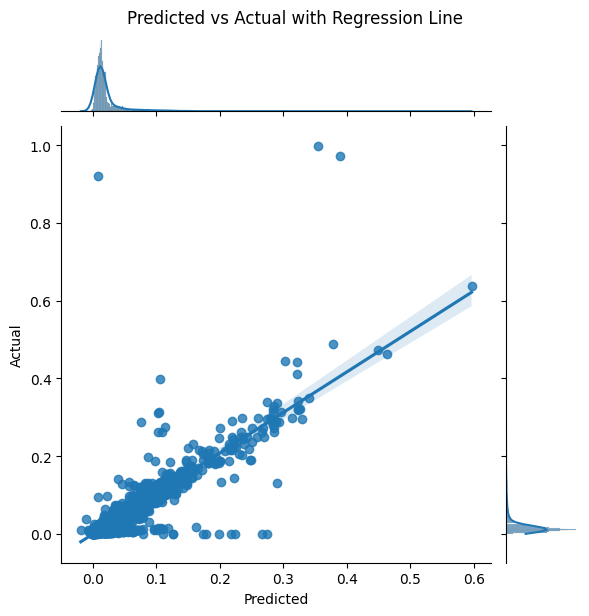

In [ ]:
# Tạo biểu đồ phân tán kết hợp với hồi quy
plt.figure(figsize=[8,6])
p = sns.jointplot(x='Predicted', y='Actual', data=actualvspredicted, kind='reg')

# Thay vì plt.xlabel và plt.ylabel, sử dụng tiêu đề
p.set_axis_labels('Predicted', 'Actual')
p.fig.suptitle('Predicted vs Actual with Regression Line', y=1.02)

plt.show()

In [ ]:
r2_score_catboost_train = r2_score(y_train, y_pred_catboost)
r2_score_catboost_test = r2_score(y_test, y_pred_catboost_test)
print('R2_score (train): ', r2_score_catboost_train)
print('R2_score (test): ', r2_score_catboost_test)

R2_score (train):  0.9645207294282651
R2_score (test):  0.7763539679178462


In [ ]:
RMSE_catboost_train = np.sqrt(mean_squared_error(y_train, y_pred_catboost))
RMSE_catboost_test = np.sqrt(mean_squared_error(y_test, y_pred_catboost_test))
print('RMSE (train): ', RMSE_catboost_train)
print('RMSE (test): ', RMSE_catboost_test)

RMSE (train):  0.007831552274422043
RMSE (test):  0.020440488607374505


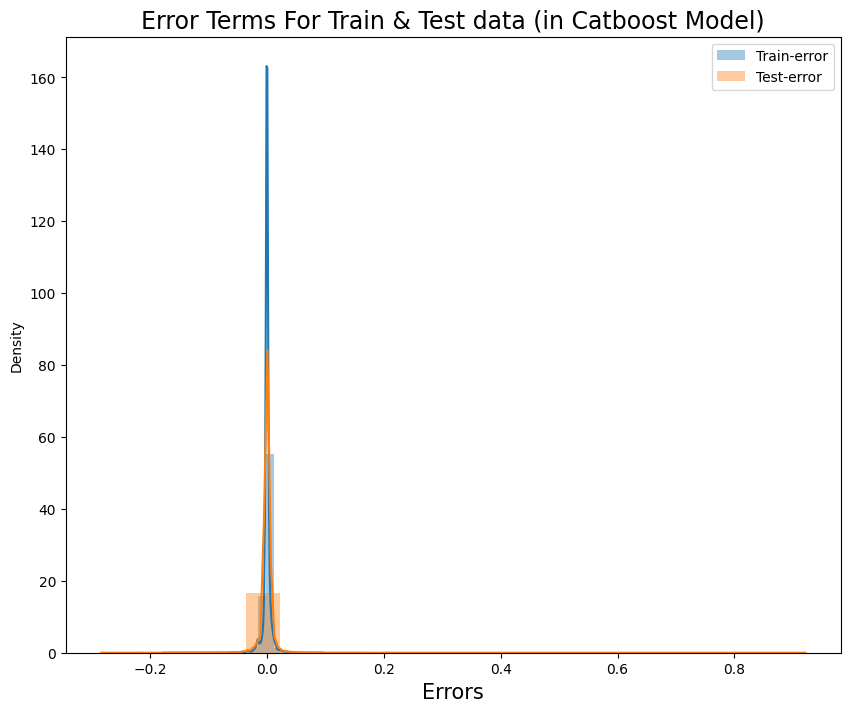

In [ ]:
fig = plt.figure(figsize=[10,8])
sns.distplot((y_train.ravel() - y_pred_catboost), bins = 20, label='Train-error')
sns.distplot((y_test.ravel() - y_pred_catboost_test), bins = 20, label='Test-error')
plt.title('Error Terms For Train & Test data (in Catboost Model)', fontsize = 17)
plt.xlabel('Errors', fontsize = 15)
plt.legend(loc='best')
plt.show()

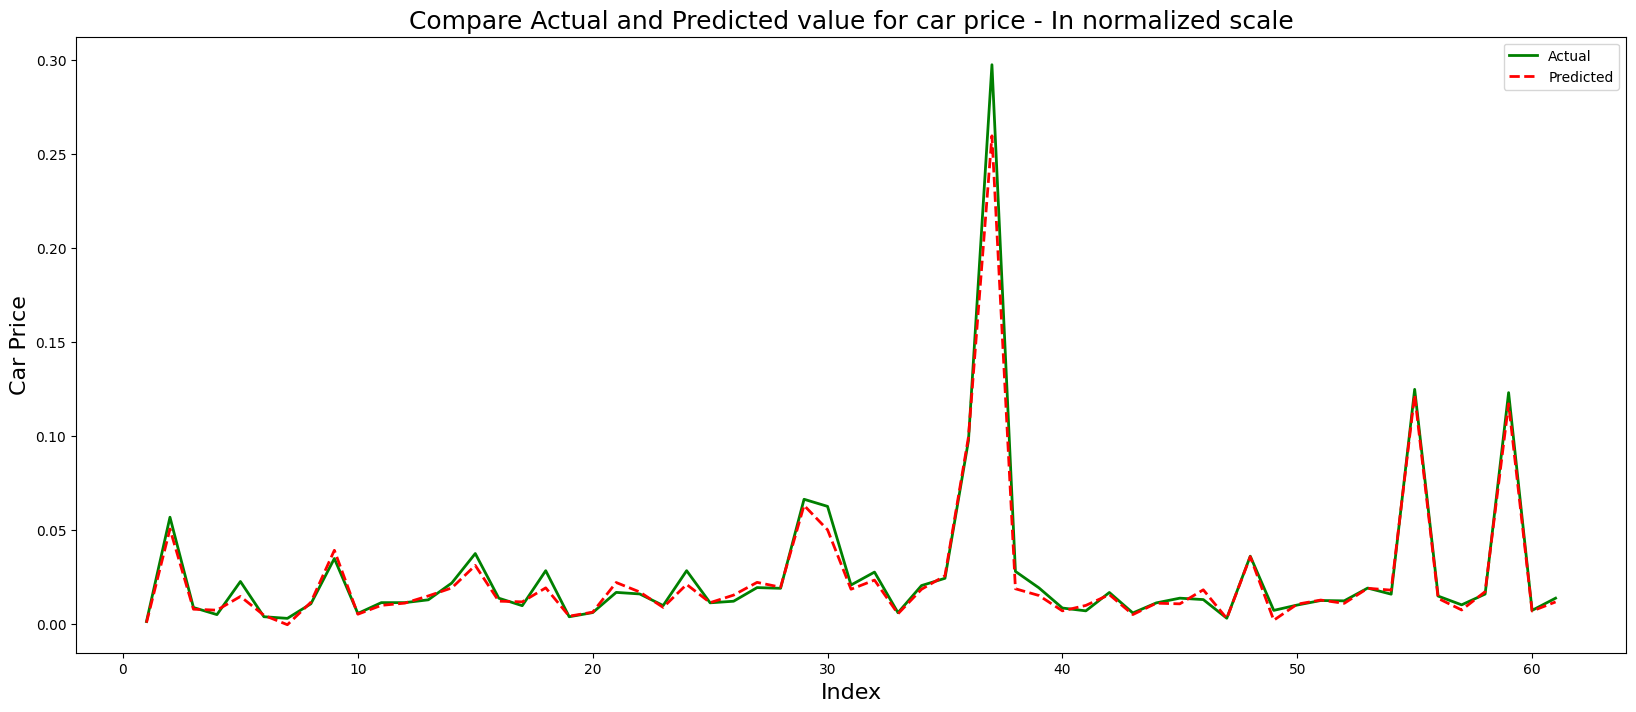

In [ ]:
# Tạo trục x với 61 phần tử
a = [i for i in range(1, 62)]
p = [i for i in range(1, 62)]

plt.figure(figsize=(20,8))
plt.plot(a, y_test[:61], color="green", linewidth=2, linestyle="-", label='Actual')
plt.plot(p, y_pred_catboost_test[:61], color="red",  linewidth=2, linestyle="--", label='Predicted')
plt.title('Compare Actual and Predicted value for car price - In normalized scale',  fontsize=18)
plt.xlabel('Index', fontsize=16)
plt.ylabel('Car Price', fontsize=16)
plt.legend()
plt.show()

# **Test**

In [ ]:
url = 'https://raw.githubusercontent.com/buudinh16/Car_Price_Prediction/main/Test1.csv'
test1 = pd.read_csv(url)
test1

,origin,car_model,mileage,exterior_color,num_of_doors,seating_capacity,transmission,engine_type,engine_capacity,drive_type,fuel_consumption,brand,grade,year_of_manufacture
0,0.0,0.833333,0.000152,0.999985,0.75,0.106383,1.0,0.000000,0.127273,0.50,0.05,0.916667,0.907692,0.882353
1,1.0,0.666667,0.000044,0.996094,1.00,0.106383,1.0,0.000000,0.154545,0.50,0.05,0.916667,0.239560,0.941176
2,0.0,0.833333,0.000080,0.000000,0.75,0.106383,1.0,0.000000,0.172727,1.00,0.05,0.666667,0.281319,0.941176
3,0.0,0.166667,0.000116,1.000000,1.00,0.106383,0.0,0.000000,0.063636,0.50,0.05,0.833333,0.545055,0.441176
4,1.0,0.666667,0.000068,0.000000,1.00,0.148936,1.0,0.000000,0.263636,0.25,0.60,0.666667,0.382418,0.911765
5,1.0,0.833333,0.000264,0.996094,0.75,0.106383,1.0,0.000000,0.172727,0.25,0.45,0.666667,0.162637,0.794118
6,0.0,0.833333,0.000152,0.996094,0.75,0.106383,1.0,0.000000,0.127273,0.50,0.05,0.916667,0.907692,0.970588
7,1.0,0.333333,0.000100,0.000000,0.75,0.085106,1.0,0.000000,0.263636,0.25,0.05,0.666667,0.727473,0.823529
8,0.0,0.666667,0.000364,0.000000,1.00,0.148936,1.0,0.666667,0.218182,1.00,0.35,0.166667,0.309890,0.705882
9,1.0,0.166667,0.000116,0.996094,1.00,0.106383,1.0,0.000000,0.127273,0.50,0.05,0.916667,0.971429,0.764706


In [ ]:
url_p ='https://raw.githubusercontent.com/buudinh16/Car_Price_Prediction/main/Price1.csv'
price_actual = pd.read_csv(url_p)
price_actual

,0
0,0.010877
1,0.021328
2,0.056884
3,0.001000
4,0.119618
5,0.022078
6,0.013877
7,0.102390
8,0.011252
9,0.011002


In [ ]:
price_predict = catboost_model.predict(test1)

In [ ]:
price_actual = price_actual.values.ravel()
price_predict = price_predict.ravel()

actualvspredicted = pd.DataFrame({
    "Actual": price_actual,
    "Predicted": price_predict,
    'Different': abs(price_actual - price_predict)
})
actualvspredicted.style.background_gradient(cmap='YlGn')

,Actual,Predicted,Different
0,0.010877,0.011266,0.000389
1,0.021328,0.018807,0.002521
2,0.056884,0.047423,0.009460
3,0.001000,0.001518,0.000518
4,0.119618,0.123687,0.004069
5,0.022078,0.026567,0.004489
6,0.013877,0.012449,0.001428
7,0.102390,0.101110,0.001280
8,0.011252,0.011744,0.000493
9,0.011002,0.010822,0.000180


In [ ]:
#Chuyển đổi giá thực ở dạng 0,1 về dạng gốc
price_actual_reshape = price_actual.reshape(-1, 1)
inverse_actual = scale_target.inverse_transform(price_actual_reshape)

#Chuyển đổi giá dự đoán ở dạng 0,1 về dạng gốc
price_predict_reshape = price_predict.reshape(-1, 1)
inverse_predict = scale_target.inverse_transform(price_predict_reshape)

inverse_actual = inverse_actual.ravel()
inverse_predict = inverse_predict.ravel()

# Tạo DataFrame với giá trị gốc
pricereal = pd.DataFrame({
    "Actual": inverse_actual,
    "Predicted": inverse_predict,
    'Different': abs(inverse_actual - inverse_predict)
})

# Hiển thị DataFrame với gradient màu
pricereal.style.background_gradient(cmap='YlGn')

,Actual,Predicted,Different
0,440.000000,455.563583,15.563583
1,858.000000,757.180379,100.819621
2,2280.000000,1901.652687,378.347313
3,45.000000,65.697080,20.697080
4,4789.000000,4951.739833,162.739833
5,888.000000,1067.531692,179.531692
6,560.000000,502.891479,57.108521
7,4100.000000,4048.797691,51.202309
8,455.000000,474.701697,19.701697
9,445.000000,437.809813,7.190187
